In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
raw_data = pd.read_csv(url)
print("Data read.")

raw_data.head(10)

Data read.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


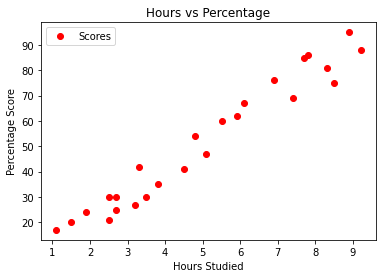

In [3]:
# Plotting the distribution of scores
raw_data.plot(x='Hours', y='Scores', style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

Dividing the data into "attributes" and "labels".

In [4]:
X = raw_data.iloc[:, :-1].values  
y = raw_data.iloc[:, 1].values  

#### Splitting Data

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0) 

### Training the data

In [6]:
from sklearn.linear_model import LinearRegression  
Linreg = LinearRegression()  
Linreg.fit(X_train, y_train) 

print("Training done")

Training done


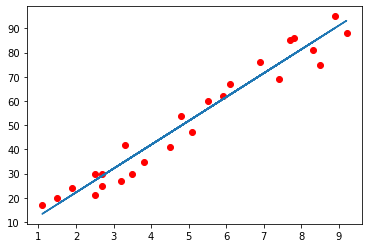

In [7]:
# Plotting the regression line
line = Linreg.coef_*X + Linreg.intercept_

# Plotting for the test data
plt.scatter(X, y, color='red')
plt.plot(X,line)
plt.show()

### Predicting

In [8]:
print(X_test) # Test data
y_pred = Linreg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


In [10]:
hours = [[9.25]]
own_pred = Linreg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.67656425238496


### Model Evaluation

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.3994503136120064
